In [3]:

# from alphabt import *
# # from alphabt.backtest import Bt
# from alphabt.statistic import indicator

# from pandas.tseries.offsets import BDay

# import matplotlib.pyplot as plt

# import pandas as pd
# import time
# import talib
# import random


# 做多 ＋ 做空(訊號轉換反手做)

In [2]:
Data().get(symbol=['AMD']).head()


open   high    low  close      volume symbol
Date                                                     
1999-12-31  14.22  14.47  14.00  14.47   1765600.0    AMD
2000-01-03  14.97  15.59  14.69  15.50   7843200.0    AMD
2000-01-04  15.12  15.50  14.59  14.62   6290200.0    AMD
2000-01-05  14.53  15.06  14.00  15.00   8204600.0    AMD
2000-01-06  15.50  16.00  15.25  16.00  11489400.0    AMD

In [3]:
class CCI(Strategy):
    def __init__(self):
        self.data = Data().get(symbol=['AMD'])
        self.init_capital = 10000
        self.cci = self.indicator('CCI')

    def signal(self, index):

        if (self.cci['CCI'][index] > -100) & (self.cci['CCI'][index - 1] < -100) & (not self.long_position):
            #先將做空部位買回，再做多
            if self.short_position:
                self.close_position()
            self.buy(unit=1, stop_loss=0.1, stop_profit=0.1)
        if (self.cci['CCI'][index] < 100) & (self.cci['CCI'][index - 1] > 100) & (not self.short_position):
            # 先賣出多頭部位，再做空
            if self.long_position:
                self.close_position()
            self.sell(unit=-1)   




In [4]:
%%time
log, per = Bt(CCI, commission=0.08).run()

-----------------------------|
sharpe ratio | -0.941 --------|
-----------------------------|
calmar ratio | -0.004 --------|
-----------------------------|
CPU times: user 2.62 s, sys: 79.4 ms, total: 2.7 s
Wall time: 2.83 s


In [5]:
log.head()

BuyDate  BuyPrice  BuyUnits  CashPaying   SellDate  SellPrice  SellUnits  \
0 2000-03-02     20.22         1     21.8376 2000-01-24     18.620         -1   
1 2000-03-02     20.22         1     21.8376 2000-03-06     22.242         -1   
2 2000-05-12     43.53         1     47.0124 2000-03-13     24.160         -1   
3 2000-05-12     43.53         1     47.0124 2000-05-23     39.177         -1   
4 2000-05-31     42.94         1     46.3752 2000-06-08     45.000         -1   

   CashReceiving  KeepDay  profit(元)  報酬率(%)  累積報酬率(%)  MDD(%)      Equity  \
0       17.13040      -38   -4.70720 -21.555   -21.555  31.884  9995.29280   
1       20.46264        4   -1.37496  -6.296   -26.494   0.000  9993.91784   
2       22.22720      -60  -24.78520 -52.721   -65.247  91.667  9969.13264   
3       36.04284       11  -10.96956 -23.333   -73.356  14.689  9958.16308   
4       41.40000        8   -4.97520 -10.728   -76.214   4.522  9953.18788   

   EquityReturn  EquityAccumulateReturn  
0     -0.047072                  -0.047  
1     -0.013756                  -0.061  
2     -0.248003                  -0.309  
3     -0.110035                  -0.418  
4     -0.049961                  -0.468

In [6]:
per.head()

年度總損益(元)  作多次數(次)  作空次數(次)  交易總次數(次)  勝率(%)  獲利因子  最大損失(元)  最大獲利(元)  \
1999       NaN      NaN      NaN       NaN    NaN   NaN      NaN      NaN   
2000    -76.85     11.0      6.0      17.0  17.65  0.09    -25.0      4.0   
2001    -69.99     13.0      7.0      20.0   0.00  0.00     -9.0      0.0   
2002    -27.93     14.0      8.0      22.0   4.55  0.05     -4.0      1.0   
2003    -19.99      6.0      4.0      10.0  10.00  0.03     -5.0      1.0   

     個股年度報酬(%)  當年度報酬率(%)  平均交易報酬率(%)  累積年度報酬(%)  當年度權益報酬率(%)  權益累積年度報酬(%)  \
1999       NaN        NaN         NaN        NaN          NaN          NaN   
2000     -7.75     -93.16       -5.48     -93.16        -0.77        -0.77   
2001     12.32     -97.29       -4.86     -99.81        -0.71        -1.47   
2002    -60.32     -92.36       -4.20     -99.99        -0.28        -1.75   
2003    127.13     -87.83       -8.78    -100.00        -0.20        -1.95   

          權益  年化報酬率(%)  權益年化報酬率(%)  大盤年化報酬率(%)  
1999     NaN       NaN         NaN         NaN  
2000  9923.0    -93.16       -0.77       -5.20  
2001  9853.0    -95.64       -0.74       -7.89  
2002  9825.0    -95.36       -0.59      -12.03  
2003  9805.0   -100.00       -0.49       -5.42

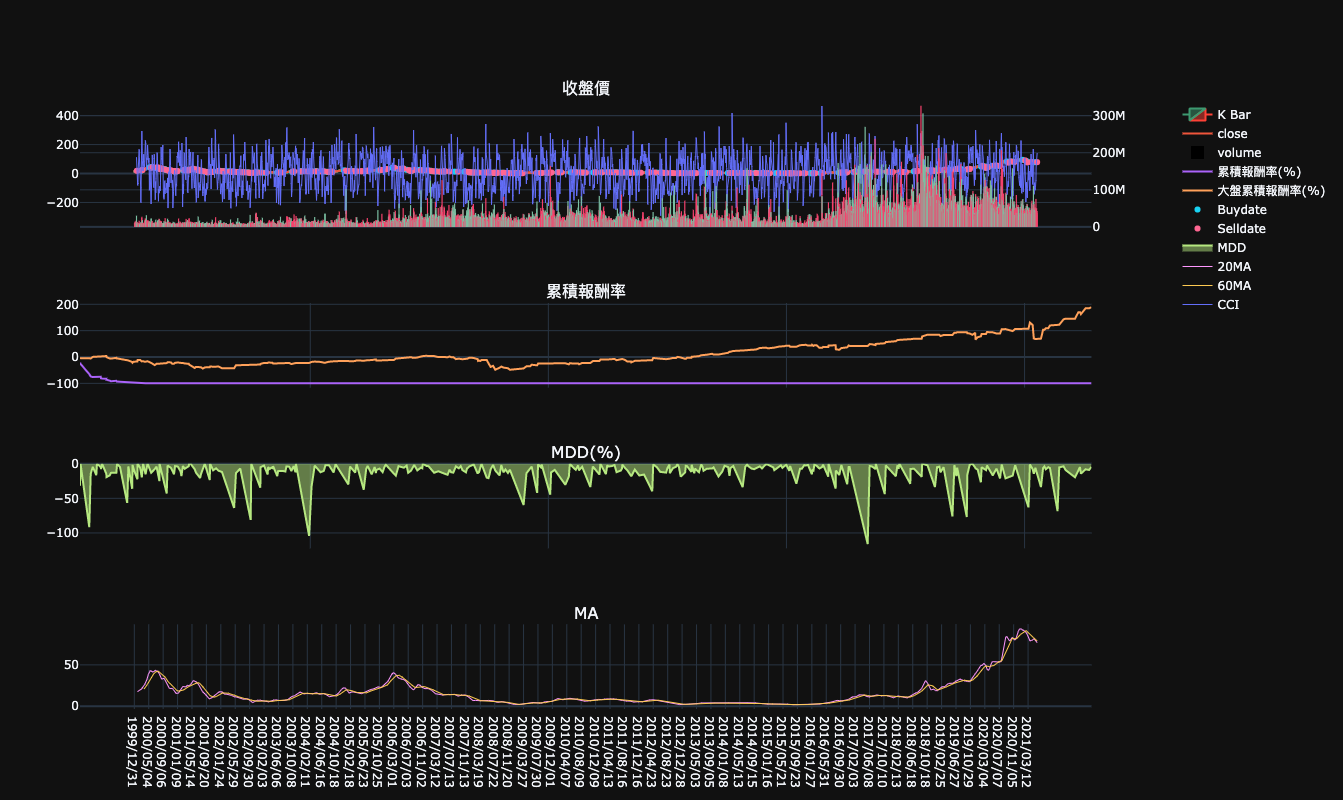

In [7]:
Bt(CCI).get_plot(subplot_technical_index=['MA'], overlap=['CCI'], sub_plot_param={'MA':[20, 60]}, overlap_param=None, log=log)
